In [1]:
import ROOT as r
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.30/04


In [2]:
gem_file = r.TFile.Open("/home/kaushik/Desktop/FinalInternship2024/dataset/models/100_300_750/GEM.root")
gem_file.ls()
tree = gem_file.Get("Garfield;1")
# tree.Print()

TFile**		/home/kaushik/Desktop/FinalInternship2024/dataset/models/100_300_750/GEM.root	
 TFile*		/home/kaushik/Desktop/FinalInternship2024/dataset/models/100_300_750/GEM.root	
  KEY: TTree	Garfield;1	Tree with vectors


In [3]:
avalanche_e = []
for entry in tree:
    avalanche = getattr(entry,"numberOfAvalancheElectrons")
    for value in avalanche:
        avalanche_e.append(value)
# count, bins , _ = plt.hist(avalanche_e,bins=100,density=False,range=(0,2000))
# plt.title("number of Avalanche electrons")
np.mean(np.array(avalanche_e)), np.std(np.array(avalanche_e))

# # Compute the bin width
# bin_width = bins[1] - bins[0]

# # Compute the total area
# total_area = np.sum(count * bin_width)

# print(f"Total area (count): {total_area}") 

(5.3834, 4.846050395941008)

(5.3834, 4.846050395941008)

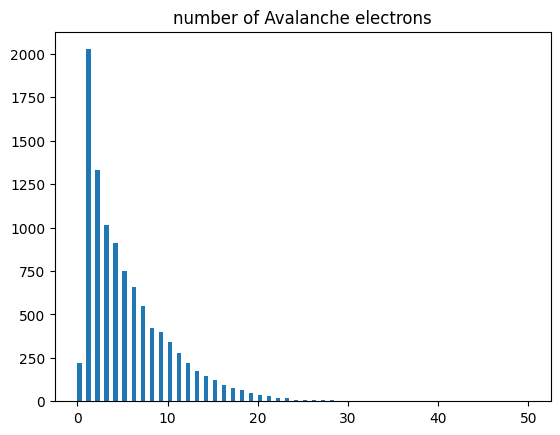

In [4]:
avalanche_e = []
for entry in tree:
    avalanche = getattr(entry,"numberOfAvalancheElectrons")
    for value in avalanche:
        avalanche_e.append(value)
hist, bins , _ = plt.hist(avalanche_e,bins=100,density=False)
plt.title("number of Avalanche electrons")
np.mean(np.array(avalanche_e)), np.std(np.array(avalanche_e))

In [5]:
gain = []
instances = []
for i in range(len(hist)):
    bin_center = (bins[i] + bins[i+1]) / 2
    gain.append(bin_center)
    instances.append(hist[i])

gain = np.array(gain)
instances = np.array(instances)
gain = gain[1:]
instances = instances[1:]

In [6]:
# def polya(G,Go,m,a):
#     return a* (((np.exp(-m*G/Go)) * m * ((m*G/Go)**(m-1))) / gamma(m))  
  
# instances = instances/ np.max(instances) 
# # For example: Go between 0 and 100, m between 0 and 10, and a between 0 and 1
# lower_bounds = [200, 1, 1]
# upper_bounds = [400, 2, 2]

# # Perform curve fitting with bounds
# params, cov = curve_fit(polya, gain, instances, bounds=(lower_bounds, upper_bounds))
# gain_fit, m_fit, a_fit = params
# plt.plot(gain,instances, 'r-', lw=2, label='Data')

# x = np.linspace(1, max(avalanche_e)+300, 1000)
# pdf_fit = polya(x, gain_fit, m_fit, a_fit )

# count, bins, _ = plt.hist(gain-10,gain+10,weights=instances, alpha=0.6,edgecolor='black', color='g')
# plt.plot(x, pdf_fit, 'k-',color='blue', label='Fitted Polya Distribution')

# plt.title('Fitting Polya Distribution')
# plt.xlabel('Gain G')
# plt.ylabel('Instances')
# plt.legend()
# plt.grid(True)
# plt.show()

# print("gain:", gain_fit, m_fit, a_fit)
# # Compute the bin width
# bin_width = bins[1] - bins[0]

# # Compute the total area
# total_area = np.sum(count * bin_width)

# print(f"Total area (count): {total_area}") 


In [7]:
# def polya(G,Go,m):
#     return (((np.exp(-m*G/Go)) * m * ((m*G/Go)**(m-1))) / gamma(m))  

# instances = instances/ np.max(instances) 
# # For example: Go between 0 and 100, m between 0 and 10, and a between 0 and 1
# lower_bounds = [200, 1]
# upper_bounds = [400, 2]

# # Perform curve fitting with bounds
# params, cov = curve_fit(polya, gain, instances, bounds=(lower_bounds, upper_bounds))
# gain_fit, m_fit = params
# plt.plot(gain,instances, 'r-', lw=2, label='Data')

# x = np.linspace(1, max(avalanche_e)+300, 1000)
# pdf_fit = polya(x, gain_fit, m_fit, )

# plt.hist(gain-10,gain+10,weights=instances, alpha=0.6,edgecolor='black', color='g')
# plt.plot(x, pdf_fit, 'k-',color='blue', label='Fitted Polya Distribution')

# plt.title('Fitting Polya Distribution')
# plt.xlabel('Gain G')
# plt.ylabel('Instances')
# plt.legend()
# plt.grid(True)
# plt.show()

# print("gain:", gain_fit, m_fit)


In [13]:
gain = np.array(gain)
instances = np.array(instances)
bins = np.linspace(0, 2000, 100)
bin_width = bins[1] - bins[0]



def gaussian(x, sigma):
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -((x -0.25)** 2) / (2 * sigma ** 2)
    return coefficient * np.exp(exponent)

def polya(G,Go,m,sigma):
    return (((np.exp(-m*G/Go)) * m * ((m*G/Go)**(m-1))) / gamma(m)) + 0* gaussian(G, sigma)
def polya_2(G,Go,m,sigma):
    x = np.linspace(np.min(G),np.max(G),100)
    bin_width = x[1] - x[0]
    polya_height = polya(G, Go, m,sigma)
    total_area = np.sum(polya_height * bin_width)
    polya_height = polya_height/total_area
    return polya_height
# polya_height = polya_2(x, 310, 1.5)
# # total_area = np.sum(polya_height * bin_width)
# # total_area
# plt.plot(bins,polya_height, 'r-', lw=2, label='Data')
# count, bin , _ = plt.hist(avalanche_e,bins=100,density=True,range=(10,2000), alpha=0.7,edgecolor='black', color='blue')
# print(gain_fit, m_fit)
# plt.title('Fitting Polya Distribution')
# plt.show()
# plt.plot(bin_width,count, '-',color='blue', label='Fitted Polya Distribution')

[ 0.25  1.25  2.25  3.25  4.25  5.25  6.25  7.25  8.25  9.25 10.25 11.25
 12.25 13.25 14.25 15.25 16.25 17.25 18.25 19.25 20.25 21.25 22.25 23.25
 24.25 25.25 26.25 27.25 28.25 29.25 30.25 31.25 32.25 33.25 34.25 35.25
 36.25 39.25 41.25 49.75]


/tmp/ipykernel_40690/875843744.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(bins, pdf_fit, 'k-',color='blue', label='Fitted Polya Distribution')


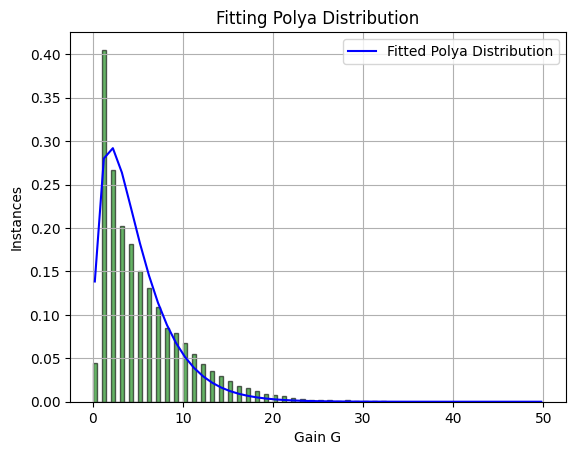

gain: 4.8518589380929615 1.6489508159626403 0.5


In [17]:
# For example: Go between 0 and 100, m between 0 and 10, and a between 0 and 1
# bins[1] - bins[0]
count, bins, _ = plt.hist(avalanche_e,density=True,bins=100, alpha=0.6,edgecolor='black', color='g')
lower_bounds = [2, 1,0]
upper_bounds = [400, 2.4,1]
count = np.array(count)
bins = np.array(bins)
# count = count[2:]
# bins = bins[2:]
# plt.hist(bins-8.75,bins+8.75,weights=count, alpha=0.6,edgecolor='black', color='g')



bins = bins[1:] - (bins[1] - bins[0])/2
bins = bins[count !=0]
count = count[count !=0]
# Perform curve fitting with bounds
params, cov = curve_fit(polya_2, bins, count, bounds=(lower_bounds, upper_bounds))
gain_fit, m_fit, sigma_fit = params

pdf_fit = polya_2(bins, gain_fit, m_fit, sigma_fit)

plt.plot(bins, pdf_fit, 'k-',color='blue', label='Fitted Polya Distribution')
# plt.plot(bins,count, 'r-', lw=2, label='Data')
plt.title('Fitting Polya Distribution')
plt.xlabel('Gain G')
# plt.text(1, 10, 'Point 1', fontsize=12, color='blue')

plt.ylabel('Instances')
plt.legend()
plt.grid(True)
plt.show()

print("gain:", gain_fit, m_fit, sigma_fit)

In [10]:
import numpy as np

def chi_square_test(observed, expected):
    # Convert lists to numpy arrays for easier computation
    observed = np.array(observed)
    expected = np.array(expected)
    
    # Calculate chi-square statistic
    chi2_statistic = np.sum((observed - expected)**2 / expected)
    
    # Calculate degrees of freedom
    degrees_of_freedom = len(observed) - 1
    alpha = 0.05
    critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)
    return chi2_statistic, critical_value
        
observed = [10, 20, 30, 40]  # Observed frequencies
expected = [15, 15, 25, 45] 

chi_square_test(count, pdf_fit)


NameError: name 'stats' is not defined